In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import warnings
warnings.filterwarnings('ignore')

In [100]:
from google.colab import files
uploaded = files.upload()


Saving TATAMOTORS.NS (3).csv to TATAMOTORS.NS (3).csv


In [101]:
data = pd.read_csv('TATAMOTORS.NS (3).csv')
date_parser ='Date'

In [102]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-29,373.899994,379.950012,372.700012,376.450012,375.128448,9532212
1,2015-07-30,381.649994,382.500000,376.000000,377.450012,376.124939,6562559
2,2015-07-31,380.799988,390.500000,380.049988,383.850006,382.502472,6947628
3,2015-08-03,386.350006,394.399994,382.000000,388.200012,386.837189,6647982
4,2015-08-04,385.899994,387.000000,378.000000,380.750000,379.413361,5621275


In [103]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1996,2023-08-29,603.599976,610.500000,603.599976,607.150024,607.150024,6956667
1997,2023-08-30,611.200012,612.900024,605.000000,605.549988,605.549988,5676055
1998,2023-08-31,608.799988,609.650024,599.049988,601.000000,601.000000,10544271
1999,2023-09-01,604.200012,614.900024,601.900024,611.200012,611.200012,10297492
2000,2023-09-04,615.599976,615.599976,606.000000,609.000000,609.000000,8392665


In [104]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2001.000000,2001.000000,2001.000000,2001.000000,2001.000000,2.001000e+03
mean,340.464168,345.176287,335.044803,339.792229,338.743254,2.639708e+07
std,139.831967,140.873687,138.478542,139.620659,139.230450,3.236684e+07
min,66.500000,66.900002,63.500000,65.300003,65.097115,0.000000e+00
25%,186.550003,190.899994,183.800003,186.199997,185.621475,8.009229e+06
50%,373.950012,379.950012,368.000000,373.600006,372.439240,1.420558e+07
75%,446.649994,452.500000,440.600006,445.850006,444.464752,3.205737e+07
max,647.000000,665.400024,642.000000,644.299988,644.299988,3.905778e+08


In [105]:
data.shape

(2001, 7)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2001 non-null   object 
 1   Open       2001 non-null   float64
 2   High       2001 non-null   float64
 3   Low        2001 non-null   float64
 4   Close      2001 non-null   float64
 5   Adj Close  2001 non-null   float64
 6   Volume     2001 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 109.6+ KB


In [107]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: xlabel='Date'>

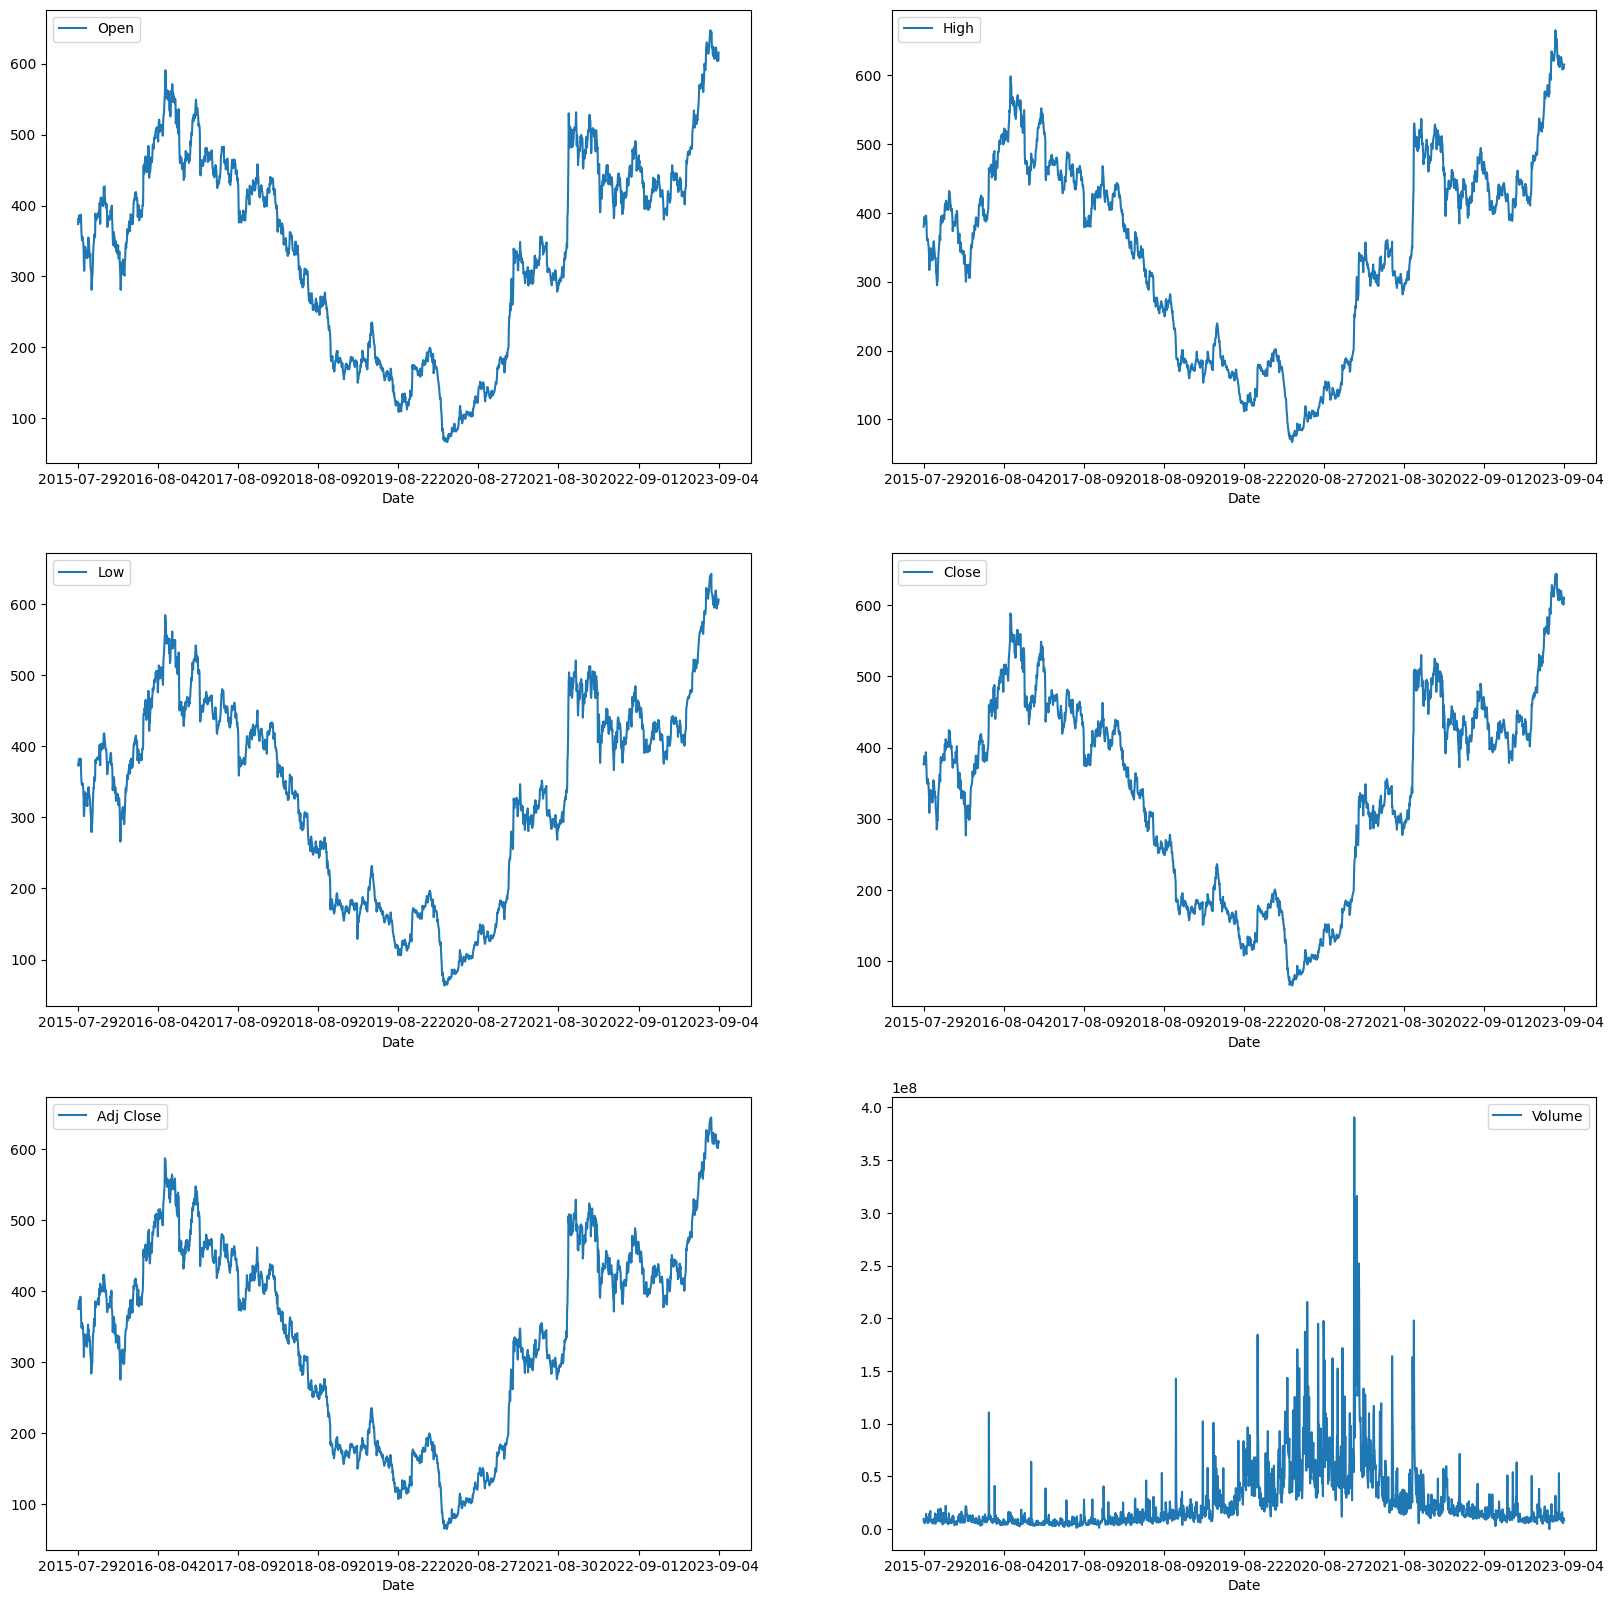

In [108]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(20,20))
data.plot(x='Date',y='Open',ax=axes[0,0])
data.plot(x='Date',y='High',ax=axes[0,1])
data.plot(x='Date',y='Low',ax=axes[1,0])
data.plot(x='Date',y='Close',ax=axes[1,1])
data.plot(x='Date',y='Adj Close',ax=axes[2,0])
data.plot(x='Date',y='Volume',ax=axes[2,1])

In [109]:
closing_price = data['Close']

In [110]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_closing_price = scaler.fit_transform(closing_price.values.reshape(-1, 1))

In [111]:
train_len=int(np.ceil(len(scaled_closing_price)*0.8))
train_data=scaled_closing_price[0:train_len,:]

In [112]:
train_x,train_y=[],[]
for i in range(60,len(train_data)):
    train_x.append(train_data[i-60:i,0])
    train_y.append(train_data[i,0])

In [113]:
train_x,train_y=np.array(train_x),np.array(train_y)
train_x=np.reshape(train_x,(train_x.shape[0],train_x.shape[1],1))

In [114]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(train_x.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [115]:
model.compile(loss='mse', optimizer='adam')

In [116]:
model.fit(train_x,train_y,batch_size=1,epochs=2)

Epoch 1/2
1541/1541 [==============================] - 45s 27ms/step - loss: 0.0021
Epoch 2/2
1541/1541 [==============================] - 41s 27ms/step - loss: 9.1699e-04


In [117]:
test_data=scaled_closing_price[train_len-60:,:]

In [118]:
test_x=[]
test_y=data[train_len:]

In [119]:
for i in range(60,len(test_data)):
    test_x.append(test_data[i-60:i,0])

In [120]:
test_x=np.array(test_x)
test_x=np.reshape(test_x,(test_x.shape[0],test_x.shape[1],1))

In [121]:
predictions = model.predict(test_x)
predictions=scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 14ms/step


In [122]:
predictions = model.predict(test_x)
predictions=scaler.inverse_transform(predictions)

13/13 [==============================] - 0s 15ms/step


In [123]:
train=data[:train_len]
valid=data[train_len:]
valid['Predictions']=predictions

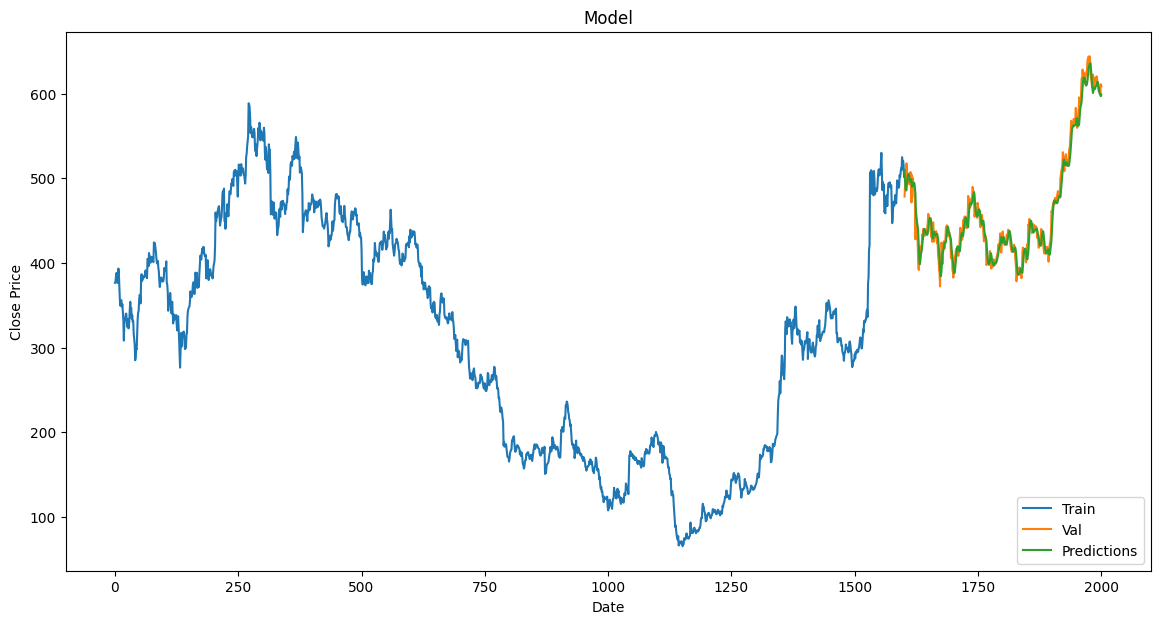

In [124]:
plt.figure(figsize=(14,7))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [125]:
future_x=test_data[-60:]
future_x=np.array(future_x)
future_x=np.reshape(future_x,(1,future_x.shape[0],1))

In [126]:
future_predictions=[]
n=40
for _ in range(n):
    future_prediction=model.predict(future_x)
    future_predictions.append(future_prediction)
    future_x=np.reshape(future_x,(1,future_x.shape[1],1))
    future_x=np.append(future_x[:,1:,:],future_prediction.reshape(1,1,1),axis=1)

1/1 [==============================] - 0s 25ms/step


In [127]:
future_predictions=np.array(future_predictions)
future_predictions=scaler.inverse_transform(future_predictions.reshape(-1,1))